# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [104]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
# Import API key
from api_keys import geoapify_key

In [105]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

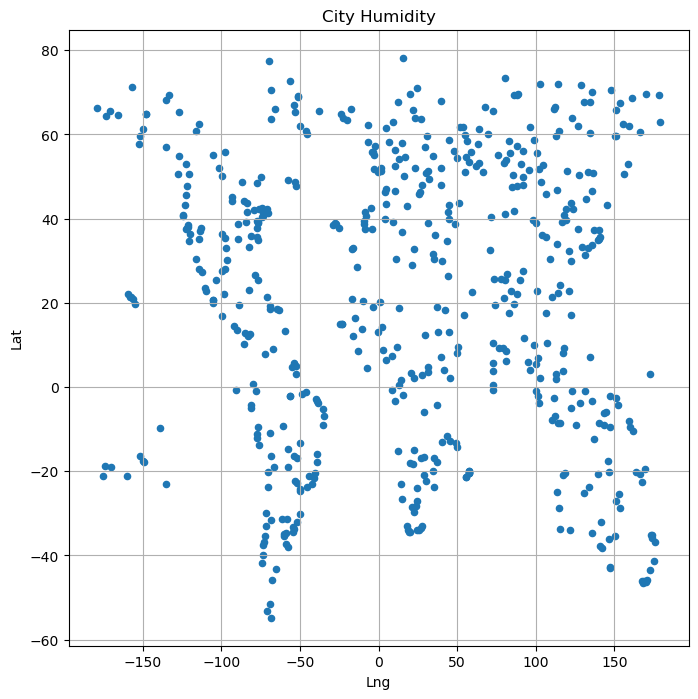

In [106]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lng", y="Lat", grid=True, figsize=(8,8),
              title="City Humidity")
# Display the map
# YOUR CODE HERE
city_data_df.plot

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [118]:
# Narrow down cities that fit criteria and drop any results with null values
# YOUR CODE HERE
select_cities = city_data_df[(city_data_df["Cloudiness"]<35) & (city_data_df["Humidity"]<60) &
                                (city_data_df["Country"]=="US") & (city_data_df["Max Temp"]<35)& (city_data_df["Wind Speed"]<3)]

# Drop any rows with null values
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE
select_cities

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
90,90,saint george,37.1041,-113.5841,13.33,44,0,1.54,US,1666108286
115,115,cedar city,37.6775,-113.0619,14.11,49,0,0.00,US,1666108304
565,565,wyndham,37.6985,-77.6125,12.81,52,3,1.79,US,1666108480


### Step 3: Create a new DataFrame called `hotel_df`.

In [127]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE
hotel_df = pd.DataFrame(select_cities).copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE
hotel_df['Hotel Name'] = ''

# Display sample data
# YOUR CODE HERE
hotel_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
90,90,saint george,37.1041,-113.5841,13.33,44,0,1.54,US,1666108286,
115,115,cedar city,37.6775,-113.0619,14.11,49,0,0.00,US,1666108304,
565,565,wyndham,37.6985,-77.6125,12.81,52,3,1.79,US,1666108480,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [148]:
# Set parameters to search for a hotel
radius = 10000
params = {"city",
    "Country",
    "filter",
    "bias",
    "apiKey"}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = city_data_df["Humidity"]>50
    params["bias"] = f"proximity:{longitude},{latitude}"
    
    # Set base URL
    base_url = "https://api.openweathermap.org/data/3.0/weather"


    # Make and API request using the params dictionaty
    
    
    # Convert the API response to JSON format

    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search


TypeError: 'set' object does not support item assignment

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [ ]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)